# Importing libraries


In [1]:
import os
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
#--------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
#---------------------------------------
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#---------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [2]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("masoudnickparvar/brain-tumor-mri-dataset")

# print("Path to dataset files:", path)

# 2. Preprocessing

## 2.1 Loading  data

In [3]:
def train_df(tr_path):
    classes, class_paths = zip(*[(label, os.path.join(tr_path, label, image))
                                 for label in os.listdir(tr_path) if os.path.isdir(os.path.join(tr_path, label))
                                 for image in os.listdir(os.path.join(tr_path, label))])

    tr_df = pd.DataFrame({'Class Path': class_paths, 'Class': classes})
    return tr_df

In [4]:
def test_df(ts_path):
    classes, class_paths = zip(*[(label, os.path.join(ts_path, label, image))
                                 for label in os.listdir(ts_path) if os.path.isdir(os.path.join(ts_path, label))
                                 for image in os.listdir(os.path.join(ts_path, label))])

    ts_df = pd.DataFrame({'Class Path': class_paths, 'Class': classes})
    return ts_df

In [5]:
base_dir = r"C:\Users\dewan\Coding\Python\pythonProject\Cancer_Prediction\Brain Tumor data\Brain Tumor data\Training"

tr_df = train_df(base_dir)

In [6]:
tr_df

,Class Path,Class
0,C:\Users\dewan\Coding\Python\pythonProject\Can...,glioma
1,C:\Users\dewan\Coding\Python\pythonProject\Can...,glioma
2,C:\Users\dewan\Coding\Python\pythonProject\Can...,glioma
3,C:\Users\dewan\Coding\Python\pythonProject\Can...,glioma
4,C:\Users\dewan\Coding\Python\pythonProject\Can...,glioma
...,...,...
5707,C:\Users\dewan\Coding\Python\pythonProject\Can...,pituitary
5708,C:\Users\dewan\Coding\Python\pythonProject\Can...,pituitary
5709,C:\Users\dewan\Coding\Python\pythonProject\Can...,pituitary
5710,C:\Users\dewan\Coding\Python\pythonProject\Can...,pituitary


In [7]:
test_dir = r"C:\Users\dewan\Coding\Python\pythonProject\Cancer_Prediction\Brain Tumor data\Brain Tumor data\Testing"
ts_df = test_df(test_dir) 

In [8]:
ts_df

,Class Path,Class
0,C:\Users\dewan\Coding\Python\pythonProject\Can...,glioma
1,C:\Users\dewan\Coding\Python\pythonProject\Can...,glioma
2,C:\Users\dewan\Coding\Python\pythonProject\Can...,glioma
3,C:\Users\dewan\Coding\Python\pythonProject\Can...,glioma
4,C:\Users\dewan\Coding\Python\pythonProject\Can...,glioma
...,...,...
1306,C:\Users\dewan\Coding\Python\pythonProject\Can...,pituitary
1307,C:\Users\dewan\Coding\Python\pythonProject\Can...,pituitary
1308,C:\Users\dewan\Coding\Python\pythonProject\Can...,pituitary
1309,C:\Users\dewan\Coding\Python\pythonProject\Can...,pituitary


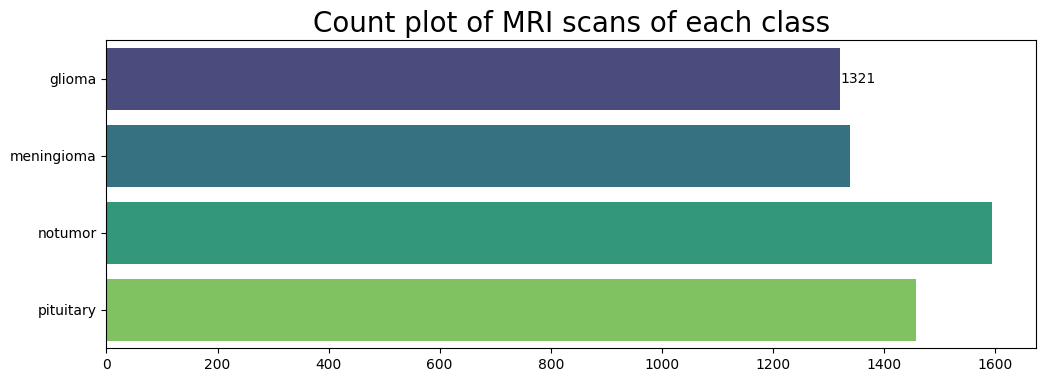

In [9]:
# Count of images in each class in train data

plt.figure(figsize= (12,4))
ax = sns.countplot(data = tr_df , y = tr_df['Class'] , palette='viridis')

plt.xlabel('')
plt.ylabel('')
plt.title("Count plot of MRI scans of each class", fontsize = 20)
ax.bar_label(ax.containers[0])
plt.show()

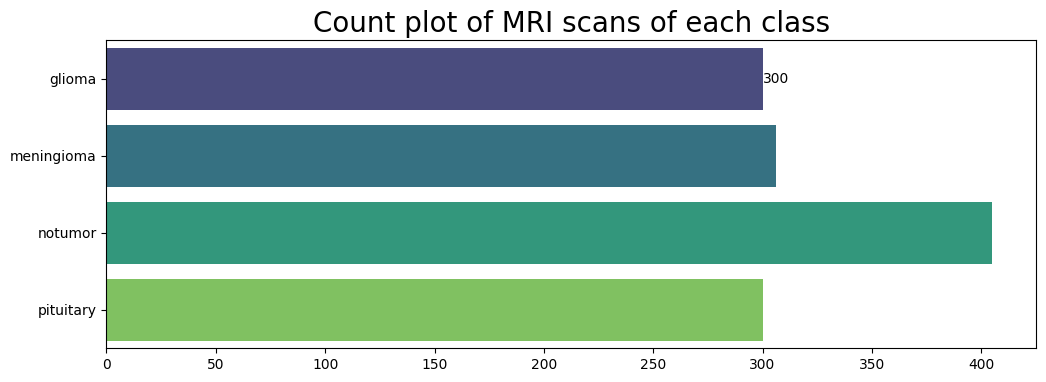

In [10]:
# Count of images in each class in train data

plt.figure(figsize= (12,4))
ax = sns.countplot(data = ts_df , y = ts_df['Class'] ,palette='viridis')

plt.xlabel('')
plt.ylabel('')
plt.title("Count plot of MRI scans of each class", fontsize = 20)
ax.bar_label(ax.containers[0])
plt.show()

## 2.2 Spliting tht data

In [11]:
valid_df , ts_df = train_test_split(ts_df, train_size= 0.5, random_state=42 , stratify=ts_df['Class'])


In [12]:
valid_df

,Class Path,Class
843,C:\Users\dewan\Coding\Python\pythonProject\Can...,notumor
329,C:\Users\dewan\Coding\Python\pythonProject\Can...,meningioma
776,C:\Users\dewan\Coding\Python\pythonProject\Can...,notumor
158,C:\Users\dewan\Coding\Python\pythonProject\Can...,glioma
591,C:\Users\dewan\Coding\Python\pythonProject\Can...,meningioma
...,...,...
477,C:\Users\dewan\Coding\Python\pythonProject\Can...,meningioma
127,C:\Users\dewan\Coding\Python\pythonProject\Can...,glioma
109,C:\Users\dewan\Coding\Python\pythonProject\Can...,glioma
764,C:\Users\dewan\Coding\Python\pythonProject\Can...,notumor


## 2.3 Data Preprocessing


In [13]:
batch_size = 32
img_size = (299, 299)

_gen = ImageDataGenerator(rescale=1/255,
                          brightness_range=(0.8, 1.2))

ts_gen = ImageDataGenerator(rescale=1/255)


tr_gen = _gen.flow_from_dataframe(tr_df, x_col='Class Path',
                                  y_col='Class', batch_size=batch_size,
                                  target_size=img_size)

valid_gen = _gen.flow_from_dataframe(valid_df, x_col='Class Path',
                                     y_col='Class', batch_size=batch_size,
                                     target_size=img_size)

ts_gen = ts_gen.flow_from_dataframe(ts_df, x_col='Class Path',
                                  y_col='Class', batch_size=16,
                                  target_size=img_size, shuffle=False)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


## 2.4 Getting Samples from data

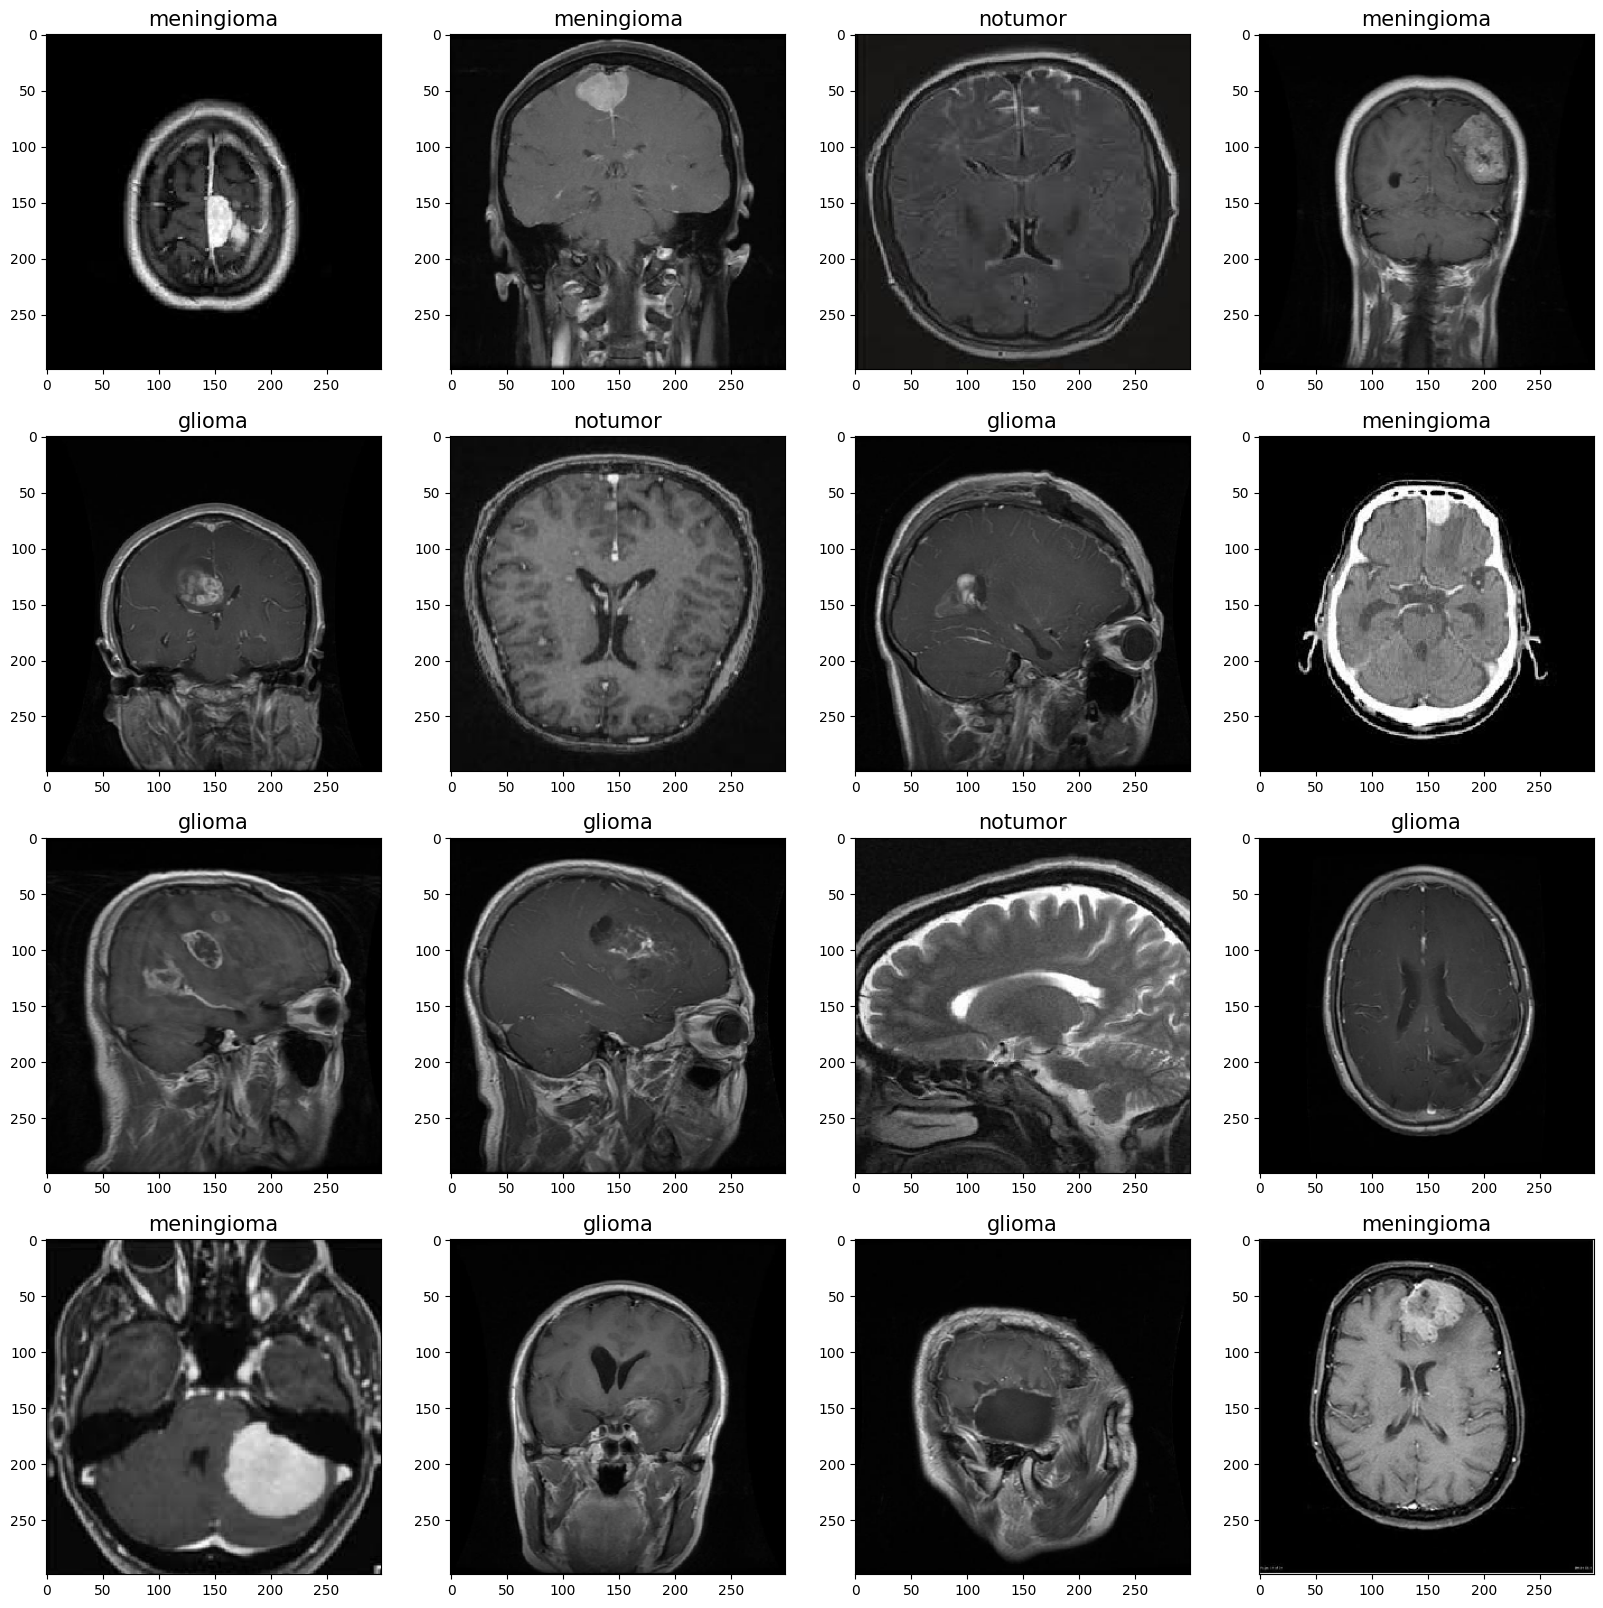

In [14]:
class_dict = tr_gen.class_indices
classes = list(class_dict.keys())
images , labels = next(ts_gen)

plt.figure(figsize=(20 , 20))

for i , (image , label) in  enumerate(zip(images , labels)) :
    plt.subplot(4,4 , i+1)
    plt.imshow(image)
    plt.imshow(image)
    class_name = classes[np.argmax(label)]
    plt.title(class_name , color = 'k' , fontsize = 15)

plt.show()

# 3. Building Deep Learning Model

In [15]:
# img_shape=(299,299,3)
# base_model = tf.keras.applications.Xception(include_top= False, weights= "imagenet",
#                             input_shape= img_shape, pooling= 'max')

# # for layer in base_model.layers:
# #     layer.trainable = False
    
# model = Sequential([
#     base_model,
#     Flatten(),
#     Dropout(rate= 0.3),
#     Dense(128, activation= 'relu'),
#     Dropout(rate= 0.25),
#     Dense(4, activation= 'softmax')
# ])

# model.compile(Adamax(learning_rate= 0.001),
#               loss= 'categorical_crossentropy',
#               metrics= ['accuracy',
#                         Precision(),
#                         Recall()])

# model.summary()



In [16]:
# tf.keras.utils.plot_model(model, show_shapes=True)

# 4. Training

In [17]:
# hist = model.fit(tr_gen,
#                  epochs=10,
#                  validation_data=valid_gen,
#                  shuffle= False)

In [18]:
import pickle 

with open('brain_tumor.pkl', 'rb') as f:
    hist = pickle.load(f)


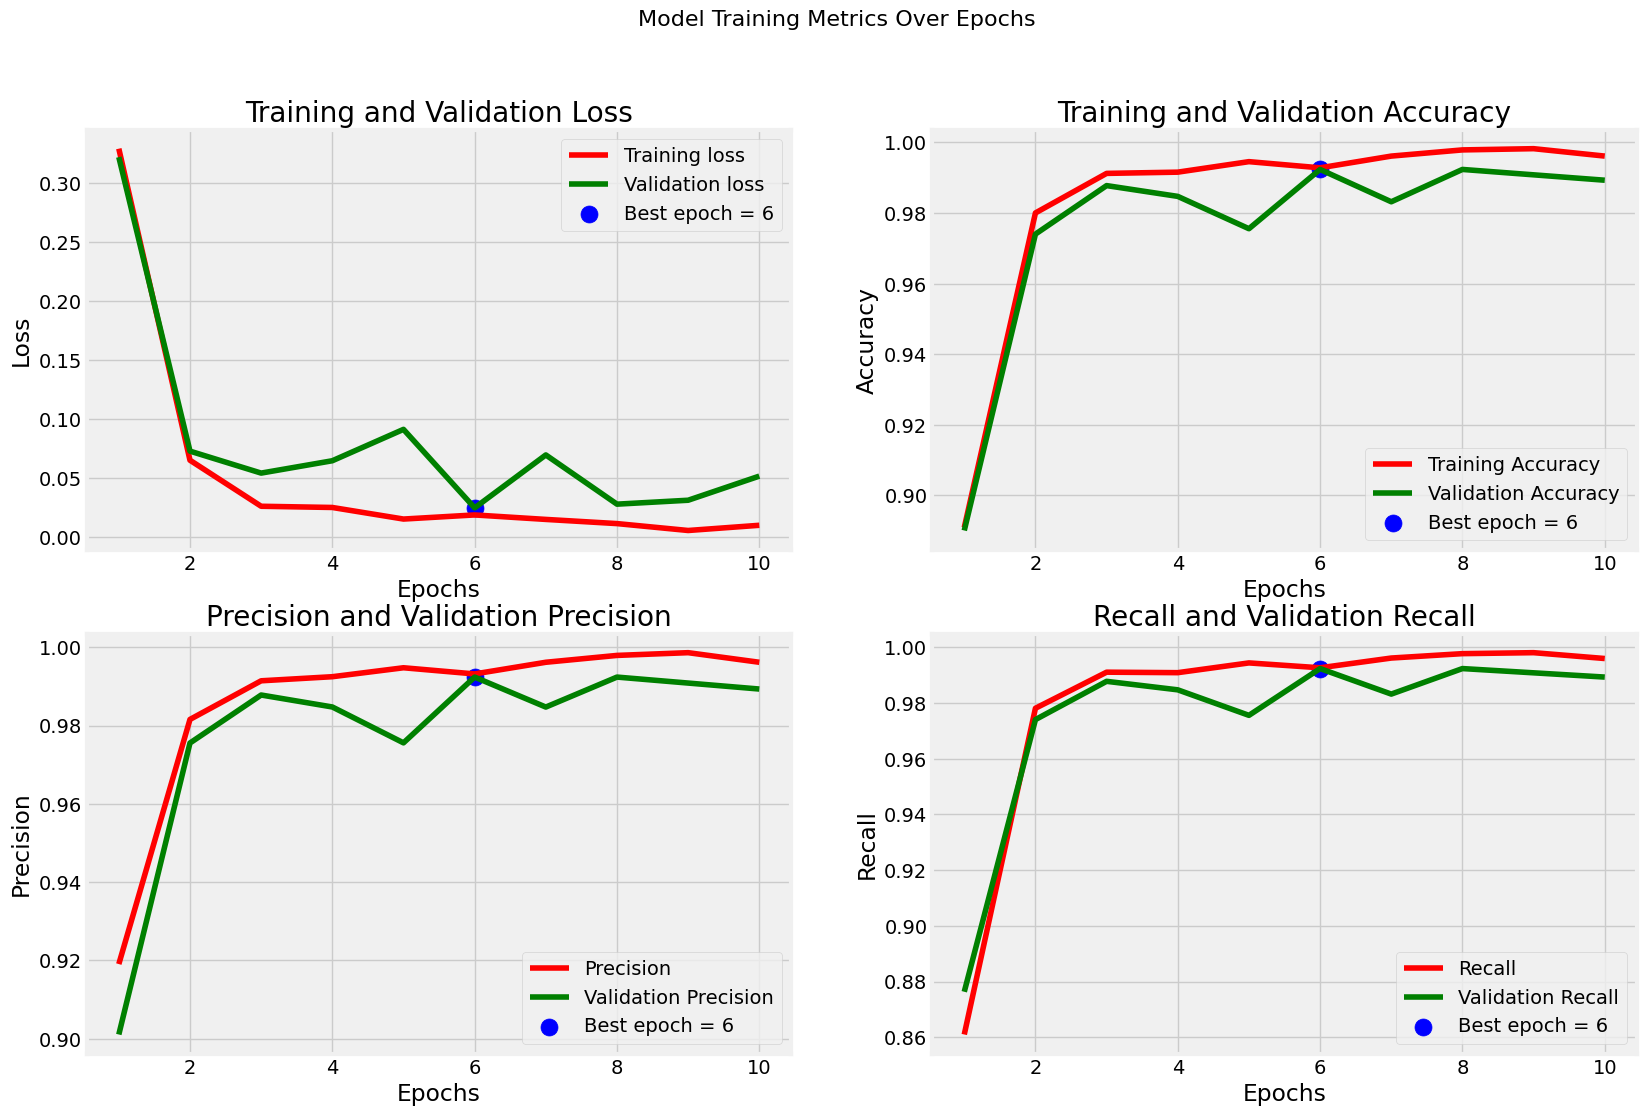

In [19]:
tr_acc = hist.history['accuracy']
tr_loss = hist.history['loss']
tr_per = hist.history['precision']
tr_recall = hist.history['recall']
val_acc = hist.history['val_accuracy']
val_loss = hist.history['val_loss']
val_per = hist.history['val_precision']
val_recall = hist.history['val_recall']

index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
index_precision = np.argmax(val_per)
per_highest = val_per[index_precision]
index_recall = np.argmax(val_recall)
recall_highest = val_recall[index_recall]

Epochs = [i + 1 for i in range(len(tr_acc))]
loss_label = f'Best epoch = {str(index_loss + 1)}'
acc_label = f'Best epoch = {str(index_acc + 1)}'
per_label = f'Best epoch = {str(index_precision + 1)}'
recall_label = f'Best epoch = {str(index_recall + 1)}'


plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')


plt.subplot(2, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label='Training loss')
plt.plot(Epochs, val_loss, 'g', label='Validation loss')
plt.scatter(index_loss + 1, val_lowest, s=150, c='blue', label=loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label='Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label='Validation Accuracy')
plt.scatter(index_acc + 1, acc_highest, s=150, c='blue', label=acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(Epochs, tr_per, 'r', label='Precision')
plt.plot(Epochs, val_per, 'g', label='Validation Precision')
plt.scatter(index_precision + 1, per_highest, s=150, c='blue', label=per_label)
plt.title('Precision and Validation Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(Epochs, tr_recall, 'r', label='Recall')
plt.plot(Epochs, val_recall, 'g', label='Validation Recall')
plt.scatter(index_recall + 1, recall_highest, s=150, c='blue', label=recall_label)
plt.title('Recall and Validation Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()

# 5. Testing


In [22]:
train_score = model.evaluate(tr_gen, verbose=1)
valid_score = model.evaluate(valid_gen, verbose=1)
test_score = model.evaluate(ts_gen, verbose=1)

print(f"Train Loss: {train_score[0]:.4f}")
print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print('-' * 20)
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"Validation Accuracy: {valid_score[1]*100:.2f}%")
print('-' * 20)
print(f"Test Loss: {test_score[0]:.4f}")
print(f"Test Accuracy: {test_score[1]*100:.2f}%")


NameError: name 'model' is not defined